# Visualizations using Matplotib, Seaborn and Folium¶

In [1]:
%pip install seaborn
%pip install folium
%pip install requests pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
import requests
import pandas as pd
from io import StringIO

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV data into a pandas DataFrame
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print('Data downloaded and read into a dataframe!')
    # Optionally, print the first few rows of the dataframe
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

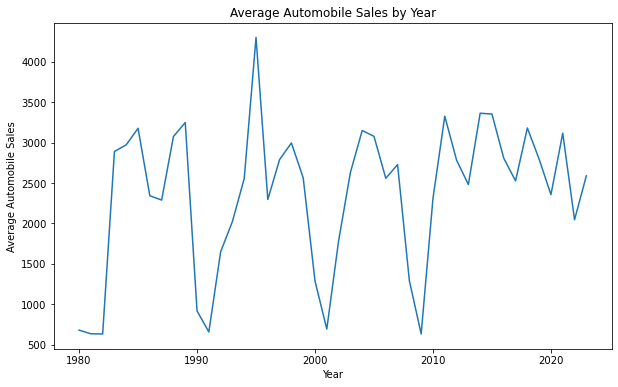

In [6]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.show()

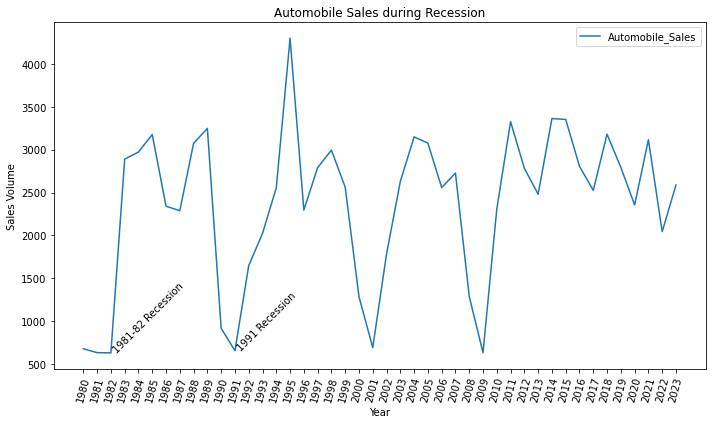

In [7]:
# Enhanced plot with x-axis ticks and annotations

plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1981-82 Recession', rotation=45)
plt.text(1991, df_line[1991], '1991 Recession', rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("Line_Plot_1.png")
plt.show()


## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

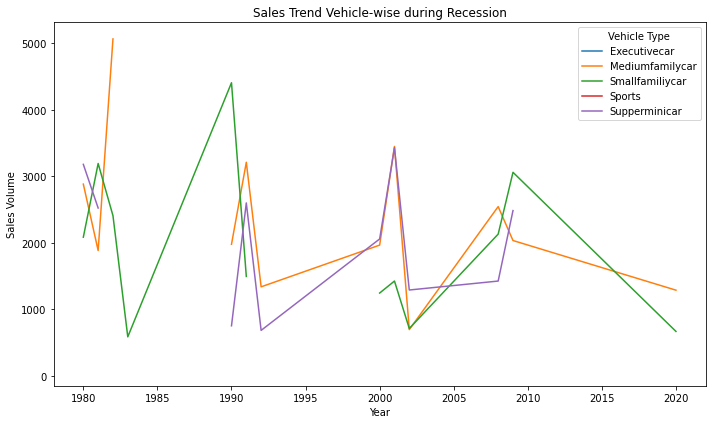

In [8]:
# Grouping by 'Year' and 'Vehicle_Type' and summing up the 'Automobile_Sales'
df_Mline = df[df['Recession'] == 1].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plotting the sales trend for each vehicle type during recession
plt.figure(figsize=(10, 6))
df_Mline.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig("Line_Plot_2.png")
plt.show()

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

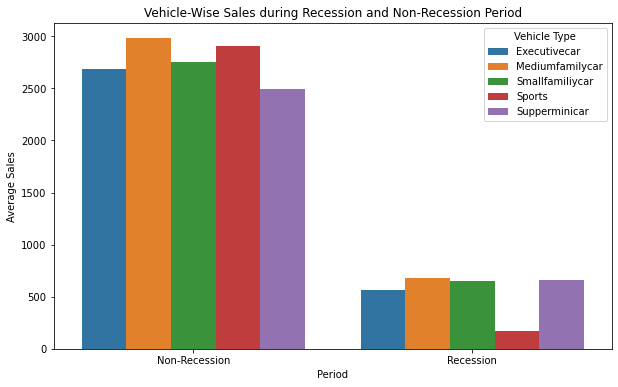

In [9]:
# Grouping data by 'Recession' and 'Vehicle_Type' and calculating the mean 'Automobile_Sales'
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plotting the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title="Vehicle Type")

plt.show()

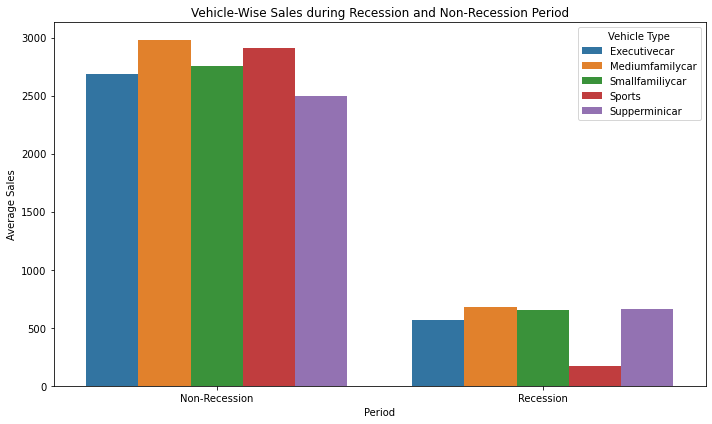

In [10]:
# Grouping the data by 'Recession' and 'Vehicle_Type' and calculating the average 'Automobile_Sales'
dd = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Creating the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig("Bar_Chart.png")
plt.show()


## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

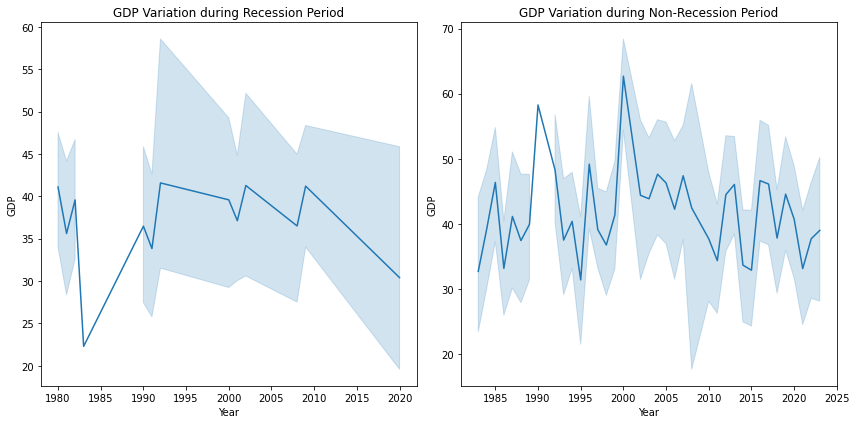

In [11]:
# Splitting data for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Creating subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting GDP variation during recession on the first subplot
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Plotting GDP variation during non-recession on the second subplot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.savefig("Subplot.png")
plt.show()

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

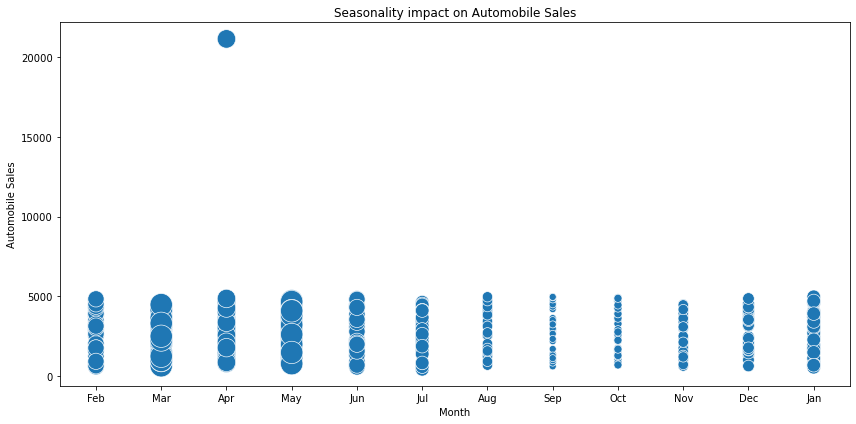

In [12]:
# Filtering for non-recession data
non_rec_data = df[df['Recession'] == 0]

# Using Seasonality_Weight for the size of bubbles
size = non_rec_data['Seasonality_Weight'] * 10  # Amplifying for better visualization

# Creating the bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(50, 500))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.savefig("Bubble.png")
plt.show()

## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions

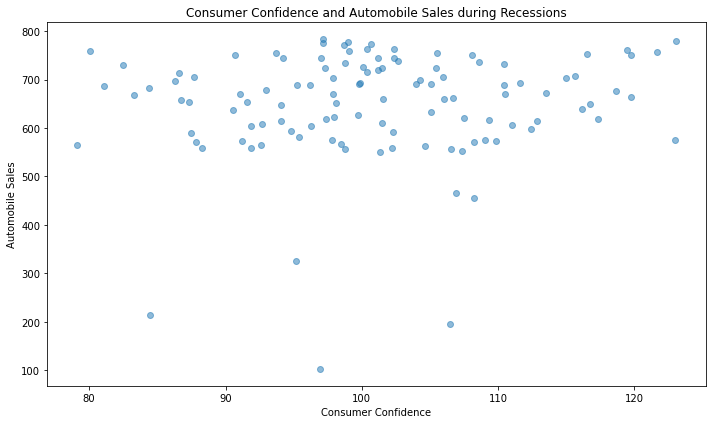

In [13]:
# Filtering for recession data
rec_data = df[df['Recession'] == 1]

# Creating a scatter plot for Consumer Confidence vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.5)
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.tight_layout()
plt.savefig("Scatter_Confidence.png")
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

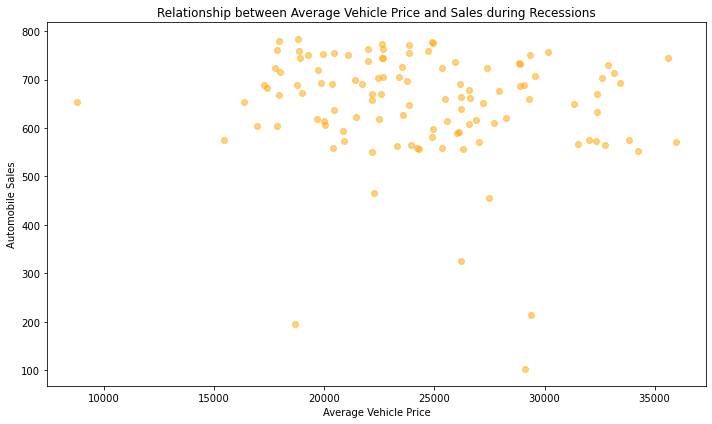

In [14]:
# Creating another scatter plot for Price vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.5, color='orange')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.tight_layout()
plt.savefig("Scatter_Price.png")
plt.show()

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

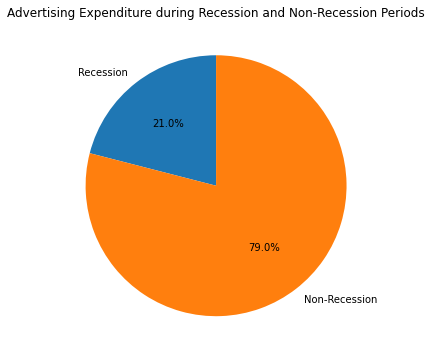

In [15]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Save the figure before showing it
plt.savefig("Pie_1.png", dpi=300, bbox_inches='tight')  # Adjust path as needed

plt.show()

## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

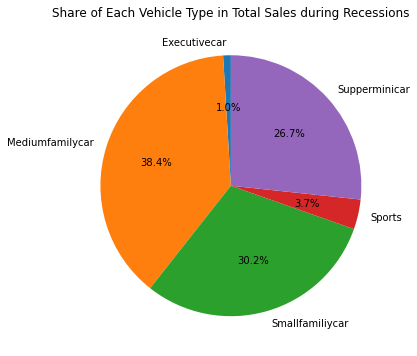

In [16]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

# Save the figure before showing it
plt.savefig("Pie_2.png", dpi=300, bbox_inches='tight')  # Adjust path as needed

# Display the plot
plt.show()

## TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

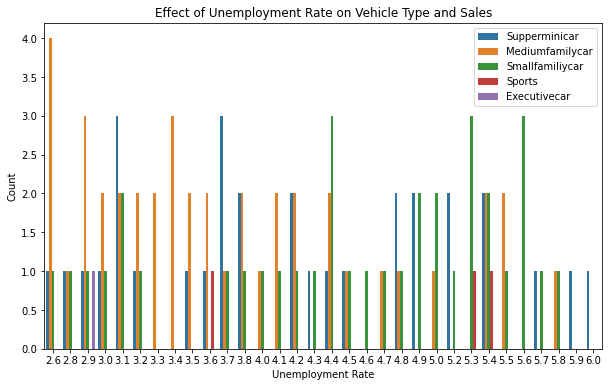

In [17]:
# Filter out the data for recession period
data= df[df['Recession'] == 1]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

# Set plot labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

# Save the plot
plt.savefig("count_plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()